In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_csv(file_dict, cols_to_plot=['latency', 'node2_pod_count']):
    """
    file_dict: a dictionary of files to plot, key is the label, value is the file path
    cols_to_plot: a list of columns to plot, default is ['latency', 'node2_pod_count']
    画出file_dict中的csv文件的各个cols_to_plot中列的折线图，一个col画一个子图，每个子图上有多个折线，每条线的数据来自一个csv文件
    """
    # 创建子图布局
    data_cache = {label: pd.read_csv(file_path) 
                 for label, file_path in file_dict.items()}
    
    num_cols = len(cols_to_plot)
    fig, axs = plt.subplots(num_cols, 1, figsize=(12, 4*num_cols))
    axs = axs if isinstance(axs, np.ndarray) else [axs]
    
    # 2. 使用缓存数据绘制
    for i, col in enumerate(cols_to_plot):
        ax = axs[i]
        for label, df in data_cache.items():
            ax.plot(df[col], label=label)
        
        ax.set_title(f'{col} Trend', fontsize=18)
        ax.set_xlabel('时间', fontsize=16)
        ax.set_ylabel(col, fontsize=16)
        ax.legend(fontsize=16)
        ax.tick_params(axis='both', which='major', labelsize=16)

        ax.grid(True)
    
    plt.tight_layout()
    plt.show()

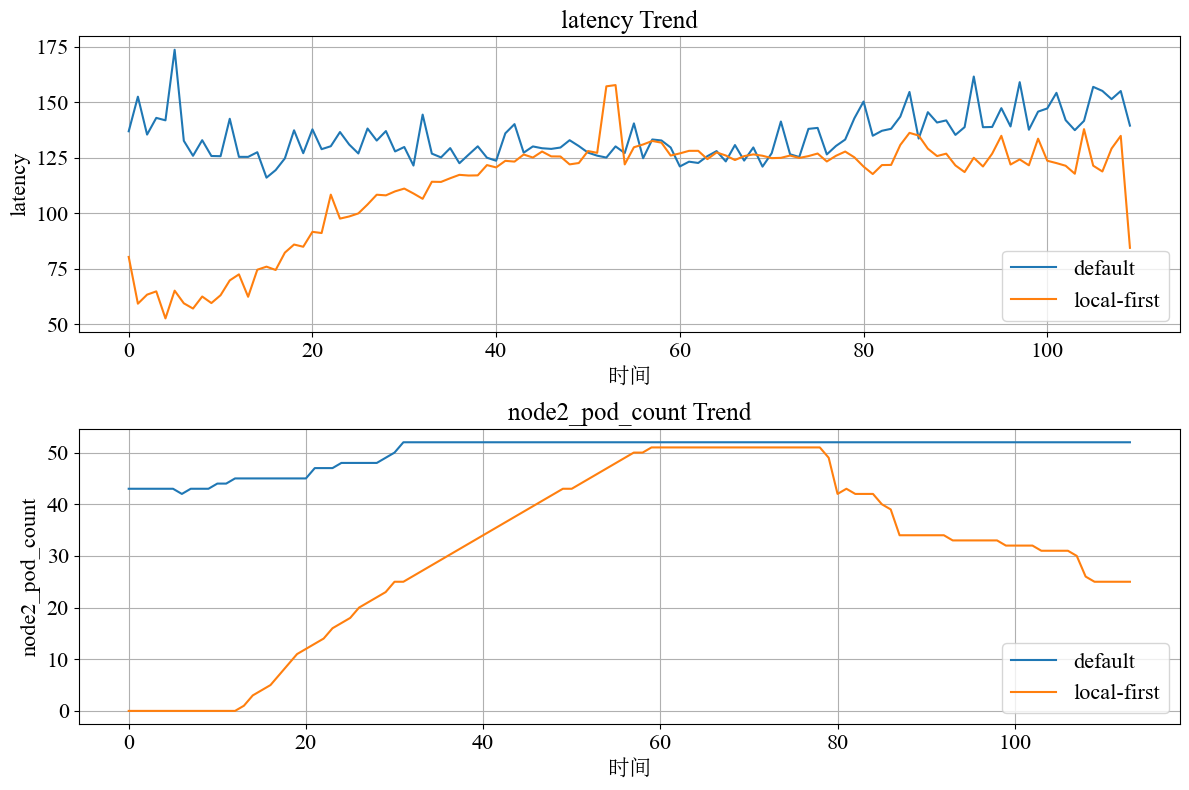

In [8]:
plot_csv({
    'default': 'prometheus_data_20250315_1730.csv',
    'local-first': 'prometheus_data_20250315_2209.csv'
})

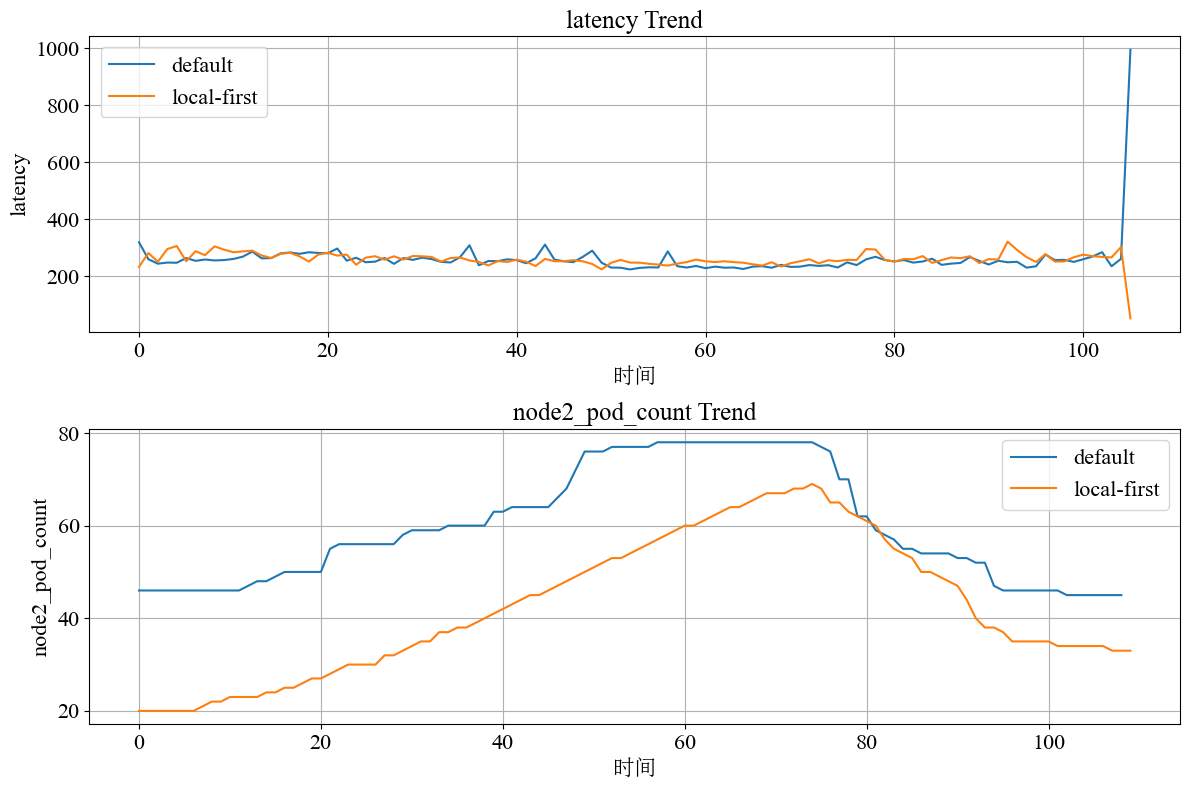

In [5]:
plot_csv({
    'default': 'prometheus_data_20250316_1531-default-diurnal-multi1-30min-40svc.csv',
    'local-first': 'prometheus_data_20250316_2126-local-first-diurnal-multi1-30min-40svc.csv'
})

## 上图结论
- Kubernetes默认的default-scheduler未考虑到节点之间的延迟，不适用于混合云混合云的场景

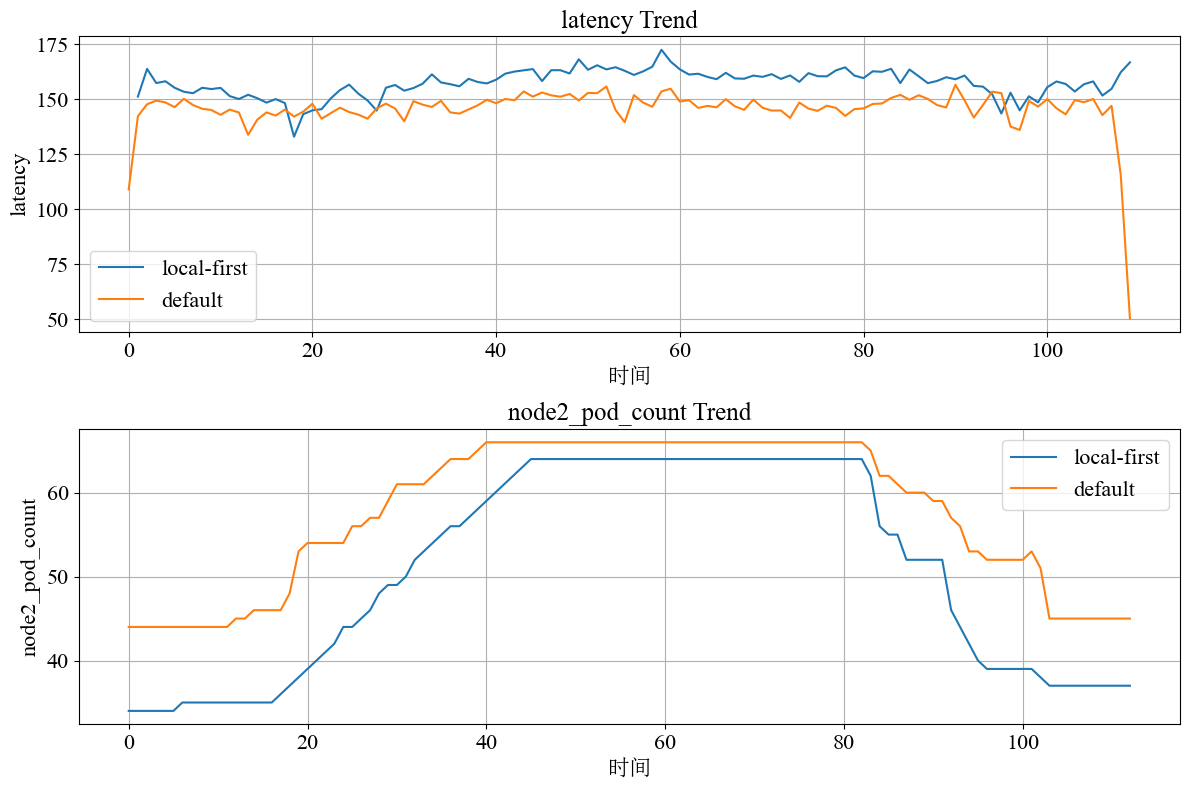

In [25]:
plot_csv({
    'local-first': 'prometheus_data_20250314_1028-local-first-diurnal-1.6-30min-40svc.csv',
    'default': 'prometheus_data_20250315_0048-default-scheduler-diurnal-1.6-30min-40svc.csv'
})

- 结果不符合预期，local-first调度器竟然延迟更高
- 设置两个微服务的测试，然后对比

In [3]:
import matplotlib.pyplot as plt

# 设置全局字体
plt.rcParams['font.family'] = ['Times New Roman', 'SimSun']  # 优先使用Times New Roman，中文回退到宋体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

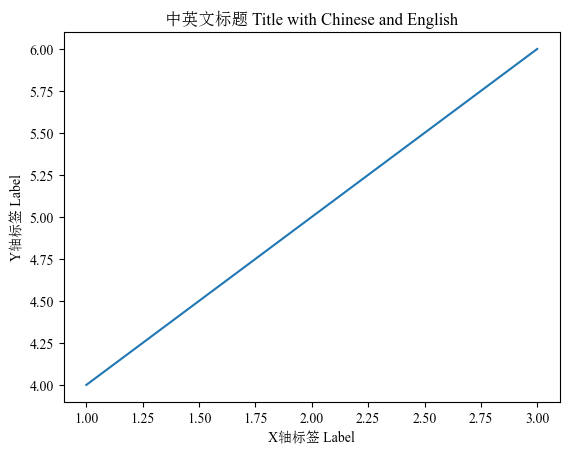

In [4]:
plt.figure()
plt.plot([1, 2, 3], [4, 5, 6])
plt.title('中英文标题 Title with Chinese and English')
plt.xlabel('X轴标签 Label')
plt.ylabel('Y轴标签 Label')
plt.show()